<a href="https://colab.research.google.com/github/Rawoosa/DAwP/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
!pip install pandas

In [ ]:
import seaborn as sns
print(sns.__version__)
import pandas as pd
import matplotlib as plt

0.11.2


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Training_data.csv", sep=",")
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Кількісні ознаки: 1, 3, 5, 6, 10, 11


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.CURRENT_HOUSE_YRS.unique()

array([13, 10, 12, 14, 11])

In [ ]:
df.Age.unique()

array([23, 40, 66, 41, 47, 64, 58, 33, 24, 78, 22, 28, 57, 48, 39, 71, 56,
       54, 50, 72, 36, 76, 38, 31, 52, 59, 21, 26, 55, 45, 77, 63, 30, 25,
       73, 75, 27, 74, 67, 46, 68, 79, 42, 60, 32, 65, 49, 35, 61, 29, 37,
       69, 62, 53, 70, 34, 43, 44, 51])

In [ ]:
df.CURRENT_HOUSE_YRS.value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64

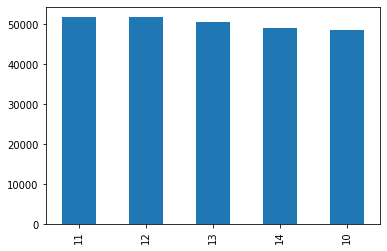

In [ ]:
df.CURRENT_HOUSE_YRS.value_counts().plot.bar()

**4**

In [ ]:
temp_df = df[df.Profession.isin(["Civil_servant","Chemical_engineer","Graphic_Designer","Design_Engineer"])]

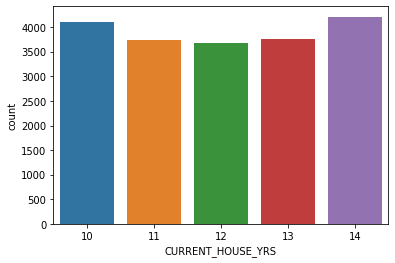

In [ ]:
sns.countplot(x='CURRENT_HOUSE_YRS',data=temp_df)

In [ ]:
df.Risk_Flag.unique()

array([0, 1])

In [ ]:
df.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

**5**

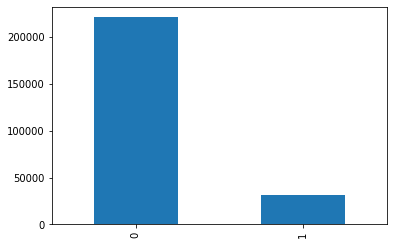

In [ ]:
df.Risk_Flag.value_counts().plot.bar()

**6**

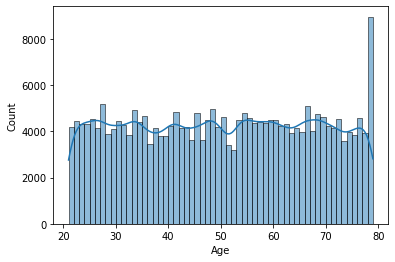

In [ ]:
sns.histplot(x="Age", data=df, binwidth=1, binrange=[df["Age"].min(),df["Age"].max()], kde=True)

In [ ]:
temp_df.Risk_Flag.value_counts()

0    17319
1     2194
Name: Risk_Flag, dtype: int64

In [ ]:
temp_df.Risk_Flag[(df.Age >= 30) & (df.Age < 40)].value_counts()

0    2699
1     394
Name: Risk_Flag, dtype: int64

**7**

In [ ]:
Age_no_return = df.Risk_Flag[(df.Age >= 30) & (df.Age < 40)].value_counts()[1]/df.Risk_Flag.size
Age_return = df.Risk_Flag[(df.Age >= 30) & (df.Age < 40)].value_counts()[0]/df.Risk_Flag.size
Age_random_return = df.Risk_Flag[(df.Age >= 30) & (df.Age < 40)].value_counts()[1]/df.Age[df.Risk_Flag == 1].size

**8**

In [ ]:
(temp_df.Profession[temp_df.Risk_Flag==0].value_counts()/temp_df.Profession.value_counts()).sort_values(ascending=False)

Design_Engineer      0.893001
Chemical_engineer    0.888377
Graphic_Designer     0.884630
Civil_servant        0.884206
Name: Profession, dtype: float64

In [ ]:
(temp_df.Profession[temp_df.Risk_Flag==0].value_counts()/temp_df.Profession.value_counts()).sort_values(ascending=False).idxmax()

'Design_Engineer'

**9**

In [ ]:
(temp_df.House_Ownership[temp_df.Risk_Flag==1].value_counts()/temp_df.House_Ownership.value_counts()).sort_values(ascending=False)

norent_noown    0.131387
rented          0.114858
owned           0.065617
Name: House_Ownership, dtype: float64

In [ ]:
(temp_df.House_Ownership[temp_df.Risk_Flag==0].value_counts()/temp_df.House_Ownership.value_counts()).sort_values(ascending=False).idxmax()

'owned'

**10**

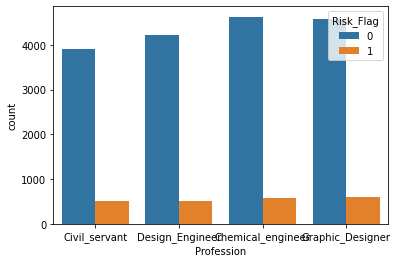

In [ ]:
sns.countplot(x="Profession", hue="Risk_Flag", data=temp_df)

**11**

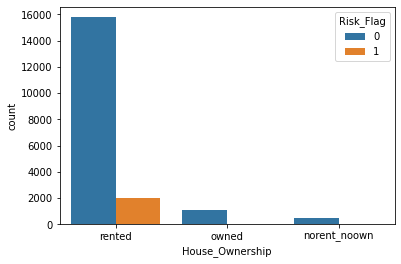

In [ ]:
sns.countplot(x="House_Ownership", hue="Risk_Flag", data=temp_df)

**12**

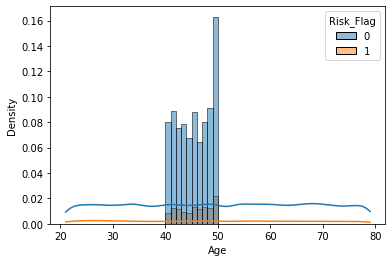

In [ ]:
sns.histplot(x="Age", data=df, hue="Risk_Flag", stat="density", binwidth=1, binrange=[40,50], kde=True)

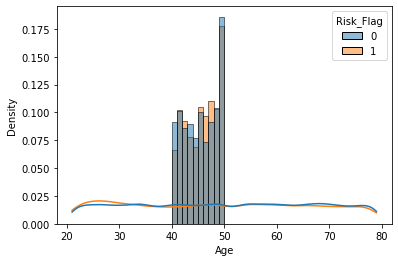

In [ ]:
sns.histplot(x="Age", data=df, hue="Risk_Flag", stat="density", common_norm=False, binwidth=1, binrange=[40,50], kde=True)

**13**

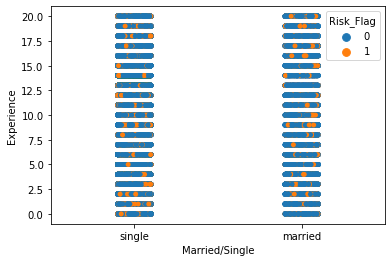

In [ ]:
sns.stripplot(x="Married/Single", y="Experience", data=df, hue="Risk_Flag")

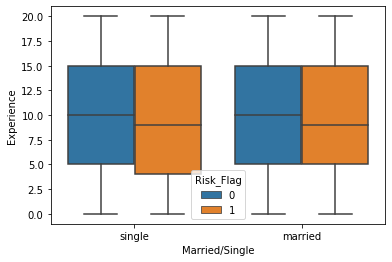

In [ ]:
sns.boxplot(x="Married/Single", y="Experience", data=df, hue="Risk_Flag")

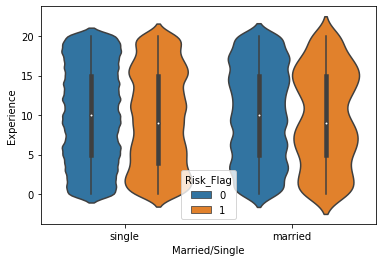

In [ ]:
sns.violinplot(x="Married/Single", y="Experience", data=df, hue="Risk_Flag")